correlation = summation(x-'x')/sqrt(sum((x-'x)**2)(y-'y')**2)
*   scatter plot tells about correlation strngth for two variables
*   coorelation lies between -1 to +1


# LINEAR REGRESSION
* SIMPLE LINEAR REGRESSION - WITH ONE DEPENDENT AND INDEPENDENT VARIABLE
* MULTIPLE LINEAR REGRESSION - WITH TWO DEPENDENT AND ONE INDEPENDENT VARIABLE

REGRESSION ANALYSIS -RA
* RA + CORR = to predict the future performance using past results.
* correlation explains the degrree of linear relationship while regression explains more precisely.
* RA is a tool that uses data on relevant varibales to dvelop a prediction equatiion or model.
* it geneartes an equation to explain relationship between vaiables.
*                          x- predictors, independent
                           y- response, predicted , dependent
---
                      Y=Bo + B1 X + e

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame({"EXP":[2,4,3,9,12,14,10,2,6,6],"SALARY":[50,70,55,75,120,150,75,40,80,70]})

In [3]:
df

,EXP,SALARY
0,2,50
1,4,70
2,3,55
3,9,75
4,12,120
5,14,150
6,10,75
7,2,40
8,6,80
9,6,70


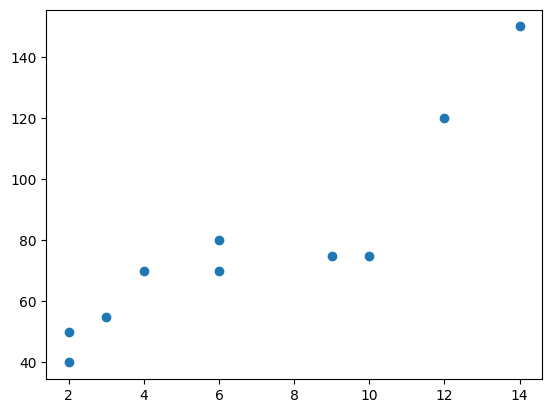

In [4]:
plt.scatter(df["EXP"],df["SALARY"])

* INFERENCES -  It has positive  strong correaltion. so good predictive power 

In [5]:
df.corr()

,EXP,SALARY
EXP,1.000000,0.907377
SALARY,0.907377,1.000000


# METHODOLOGY TO OBTAIN REGRESSIONCOEFFICIENT Bo,B1

In [6]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
data=pd.read_csv(r"D:\NewspaperData.csv")

In [8]:
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [9]:
data.shape   # Y= sunday   X= daily
# y =Bo + B1 * (X)

(34, 3)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


CORRELATION

In [11]:
data["daily"].corr(data["sunday"])    ### 0.9 = high posiive correlation

0.9581543140785462

In [12]:
data[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


sns.distplot(data["daily"])
sns.distplot(data["sunday"])
plt.show()


<Axes: xlabel='daily', ylabel='Density'>

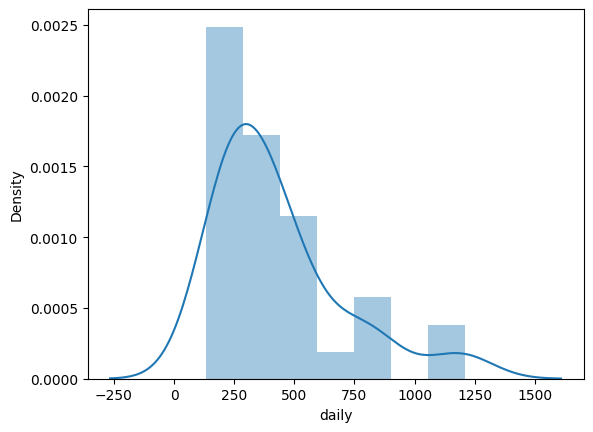

In [13]:
sns.distplot(data["daily"]) ## finding if skewed or normally distributed
                             ## skewed

<Axes: xlabel='sunday', ylabel='Density'>

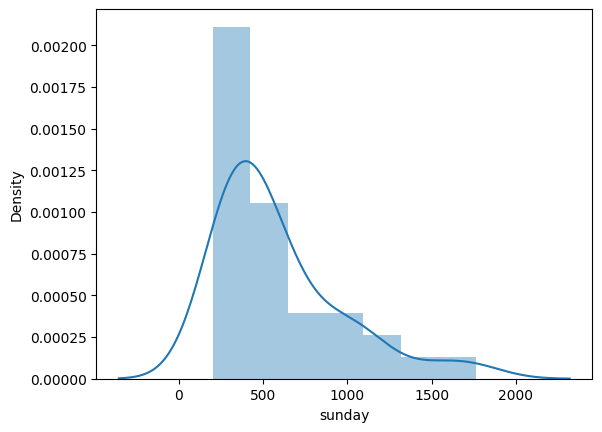

In [14]:
sns.distplot(data["sunday"])  ## skewed samely

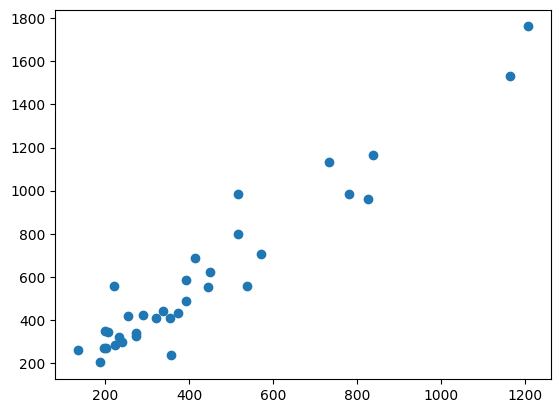

In [15]:
plt.scatter(data["daily"],data["sunday"])

fitting a linear regresson model

In [16]:
import statsmodels.formula.api as smf        # smf.ols("y~x",data=dataset_name).fit()
model=smf.ols("sunday~daily",data=data).fit()     #OLS=ORDINARY LEAST SQUARE
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           6.02e-19
Time:                        18:33:45   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

              coef~intercept -"Bo"    [13.8356]

              coef~daily - "B1"       [1.3397]

<Axes: xlabel='daily', ylabel='sunday'>

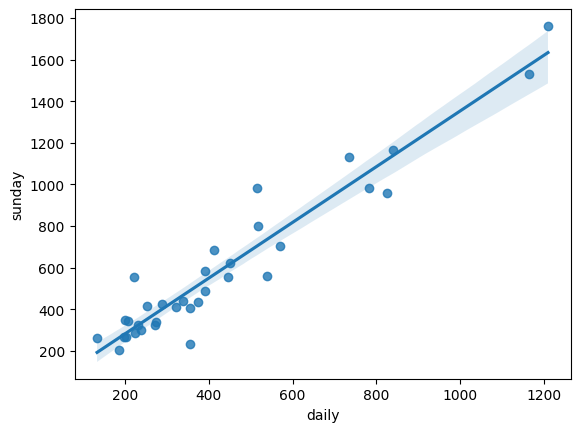

In [17]:
sns.regplot(x="daily",y="sunday",data=data)


In [18]:
model.params ### Coefficients

Intercept    13.835630
daily         1.339715
dtype: float64

In [19]:
# t and p-values using Bo and B1
print(model.tvalues,  '\n',  model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [20]:
#  r-squared value 
(model.rsquared)    ##excellent value

0.9180596895873295

----

predict for new value

In [21]:
#predict for 200 and 300 dialy circulations
newdata=pd.Series([200,300])
newdata

0    200
1    300
dtype: int64

In [22]:
data_pred =pd.DataFrame(newdata,columns=["daily"])
data_pred

,daily
0,200
1,300


In [23]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

---

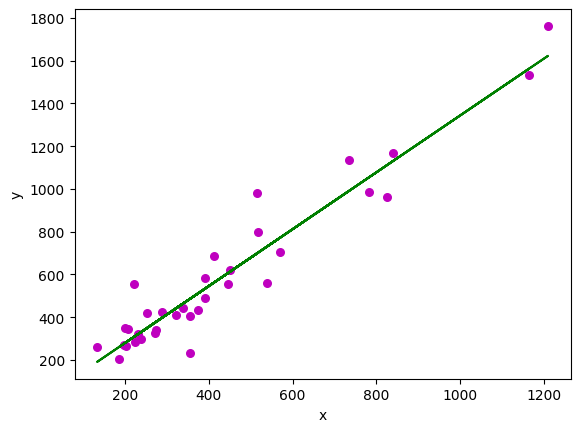

In [24]:
x=data["daily"].values
y=data["sunday"].values
plt.scatter(x,y,color="m",marker="o",s=30)
b0=13.83
b1=1.33
# predicted response vector
y_hat=b0+b1*x
#plotting the regression line
plt.plot(x,y_hat,color="g")
#putting labels
plt.xlabel("x")
plt.ylabel("y")
plt.show()



* blue dots are given data
*    line is best fit

In [25]:
model.params    #coefficients

Intercept    13.835630
daily         1.339715
dtype: float64

In [26]:
# r squared value
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# predict fro new data

In [27]:
#predict for 200 and 300 daily data circulation
new_data=pd.Series([200,300,500])
new_data


0    200
1    300
2    500
dtype: int64

In [28]:
pred=model.predict(data['daily'])
pred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [29]:
data["y_hat"]=pred

In [30]:
data

,Newspaper,daily,sunday,y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


# ESTIMATE THE ACCURACY
* MEAN SQUARE ERROR
* ROOT MSR
*  MEAN ABSOLUTE ERROR
* MEAN ABSOLUTE PERCENTAGE ERROR

In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:

from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [33]:
mean_squared_error(data["sunday"],data["y_hat"])

11268.692072241502

------

# MULTI LINEAR REGRESSION

In [40]:
from statsmodels.graphics.regressionplots import influence_plot
cars=pd.read_csv(r"D:\Cars.csv")   #X = hp,SP,VOl,Wt 
                                    #Y = MPG

In [35]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [36]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


statsmodels library used here.

In [37]:
#preparing a model using ORDINARY LEAST SQUARE (OLS) METHODOLOGY
model=smf.ols("MPG~HP+VOL+SP+WT",data=cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.54e-23
Time:                        18:34:03   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#BO =30.67
#B1=-0.20
#B2=-0.33
#B3=0.39
#B4=0.4
#coefficients
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [42]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [43]:
#CORRELATION MATRIX

cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


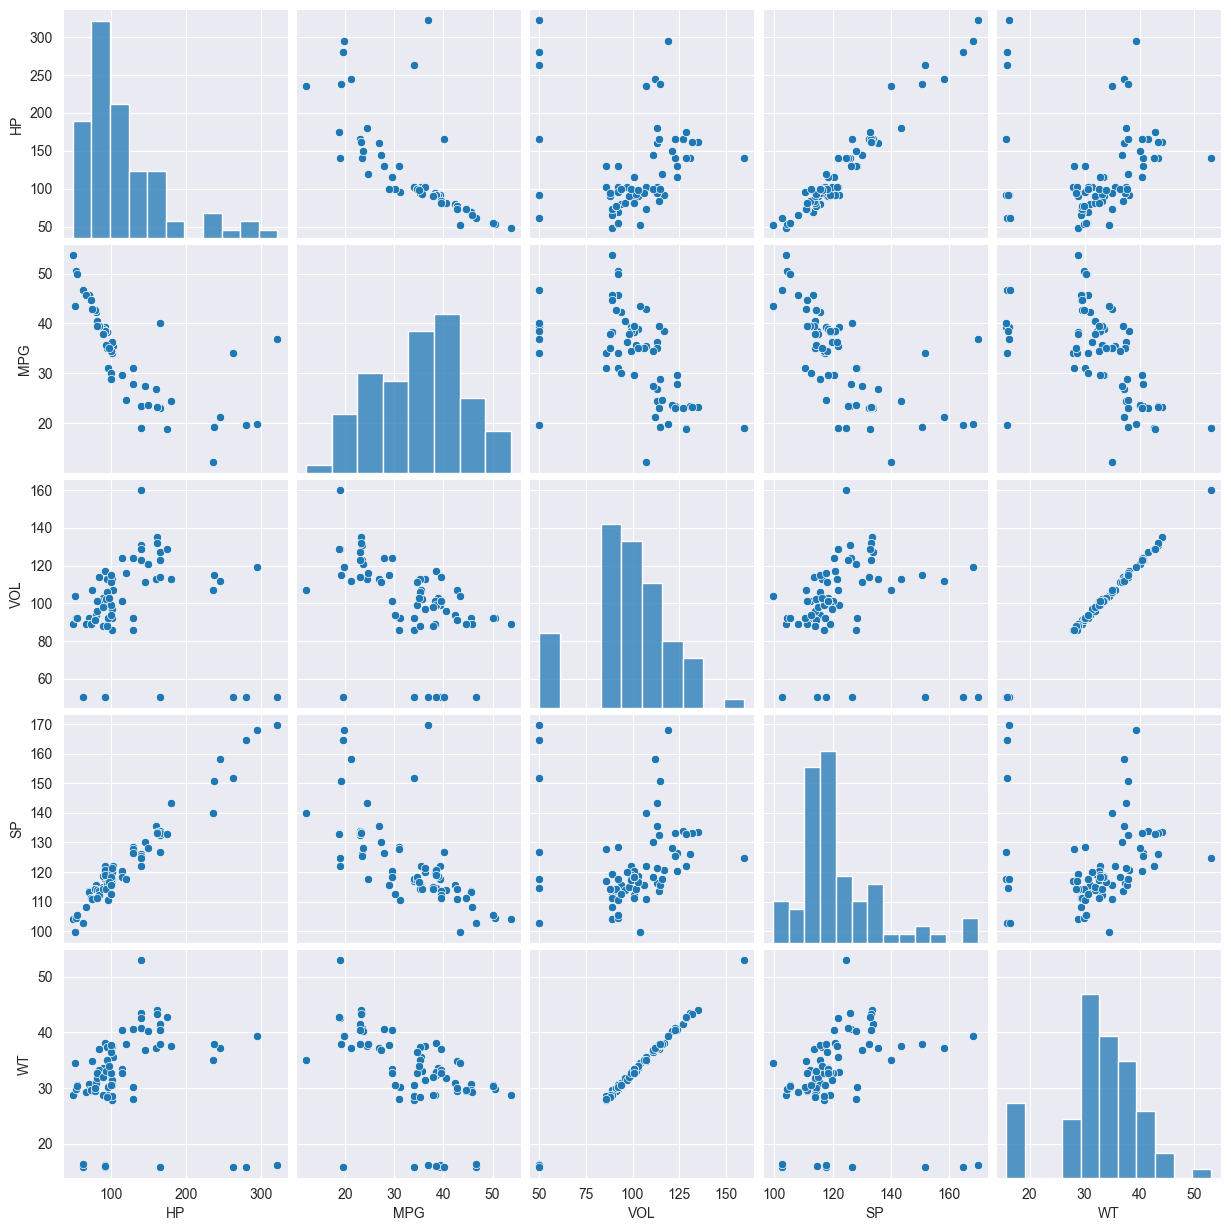

In [44]:
#scatterplot between variables with histogram
### format the plot background an d scatter plots for all the values
sns.set_style(style ="darkgrid")
sns.pairplot(cars)


# multi linear regression  model


In [46]:
# build model

import statsmodels.formula.api as smf
model = smf.ols("MPG~WT+VOL+SP+HP",data=cars).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           1.54e-23
Time:                        18:44:17   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
##coefficients

model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [49]:
model.tvalues,model.pvalues    #t and p values

(Intercept    2.058841
 WT           0.236541
 VOL         -0.590970
 SP           2.499880
 HP          -5.238735
 dtype: float64,
 Intercept    0.042936
 WT           0.813649
 VOL          0.556294
 SP           0.014579
 HP           0.000001
 dtype: float64)

In [53]:
#r-squared values
model.rsquared,model.rsquared_adj  
# RSQUARE = ACCURACY OF THE MODEL,
# RSQUARE_ADJ = THE EXTRA VARIABLE WHICH INCLUDED , IF INCREASED BEYOND  R**2= VARIABLE IS NEEDED
#                    ID ITS VALUE IS BELOW THE RSQUARED VALUE , ITS NOT NEEDED 
### SINCE RSQUARED_ADJ IS LOWER , THERE MAY BE A VARIABLE WHICH IS IRRELEVANT VARIABLE

(0.7705372737359844, 0.7584602881431415)

# SIMPLE LINEAR REGRESSION MODELS

In [56]:
ml_v =smf.ols("MPG~VOL",data=cars).fit()
#t and p values
ml_v.tvalues,ml_v.pvalues   #pvalues are less than alpha so use the variable

(Intercept    14.106056
 VOL          -5.541400
 dtype: float64,
 Intercept    2.753815e-23
 VOL          3.822819e-07
 dtype: float64)

In [61]:
ml_w =smf.ols("MPG~WT",data=cars).fit()
#t and p values
ml_w.tvalues,ml_w.pvalues      # p values are less than 0.05 individually for both VOL,WT.
                           # BUT COMBINELY , MULTICOLLINEARITY OCCURS BETWEEN VOL,WT

(Intercept    14.248923
 WT           -5.508067
 dtype: float64,
 Intercept    1.550788e-23
 WT           4.383467e-07
 dtype: float64)

multi linear regression

In [130]:
ml_vw= smf.ols("MPG~VOL+WT",data=cars).fit()
ml_vw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.43e-06
Time:                        17:38:54   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL VALIDATION TECHNIQUES


* COMPUTING MULTICOLLINEARITY THROUGH CALCULATING VIF
* RESIDUAL ANALYSIS

In [64]:
# VARIANCE IMPRESSION FACTOR
rsq_hp = smf.ols("HP~WT+VOL+SP",data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)   #16.33

rsq_wt = smf.ols("WT~HP+VOL+SP",data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)   #564.98

rsq_vol = smf.ols("VOL~WT+SP+HP",data=cars).fit().rsquared
vif_vol= 1/(1-rsq_vol)   #564.84

rsq_sp = smf.ols("SP~WT+VOL+HP",data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)   #16.35

#STORING VIF VALUES IN A DATA FRAME
d1={"variables":["HP","WT","VOL","SP"],"VIF":[vif_hp,vif_wt,vif_vol,vif_sp]}
vif_frame = pd.DataFrame(d1)
vif_frame





,variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [65]:
### if more than 20, it involves multi collinearity


# RESIDUAL ANALYSIS

TEST FOR NORMALITY OF RESIDUALS (Q-Q PLOT)

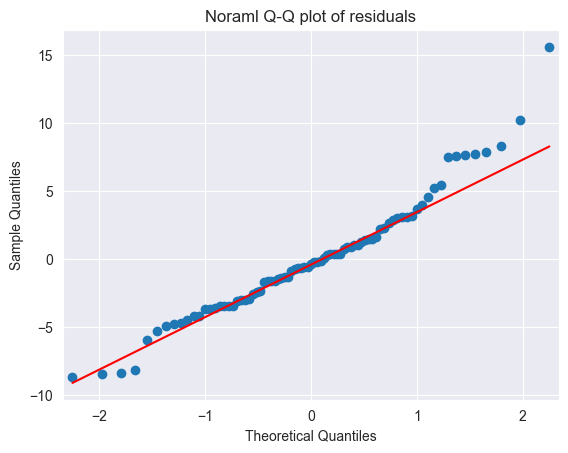

In [69]:
import statsmodels.api as sm
qqplot =sm.qqplot(model.resid,line = "q") # line-q = 45 to draw the diagonal line
plt.title("Noraml Q-Q plot of residuals")
plt.show()

In [70]:
list(np.where(model.resid>10))    # residuals are distances feom actual data points to the regression line
 # gives 0,76 index are outliers shown through above code

[array([ 0, 76], dtype=int64)]

In [131]:
# residual plot for homoscedasticity -  errors VS fitted value
def get_standardized_value(vals):
    return (vals - vals.mean())/vals.std()          # return z values 


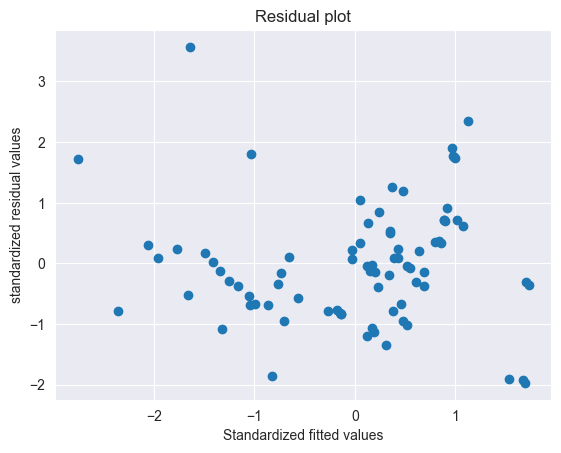

In [76]:
plt.scatter(get_standardized_value(model.fittedvalues),  ##--> model_y_hat
            get_standardized_value(model.resid))

plt.title("Residual plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()

REsiduals VS regressors
Ei        Vs     Xi

eval_env: 1


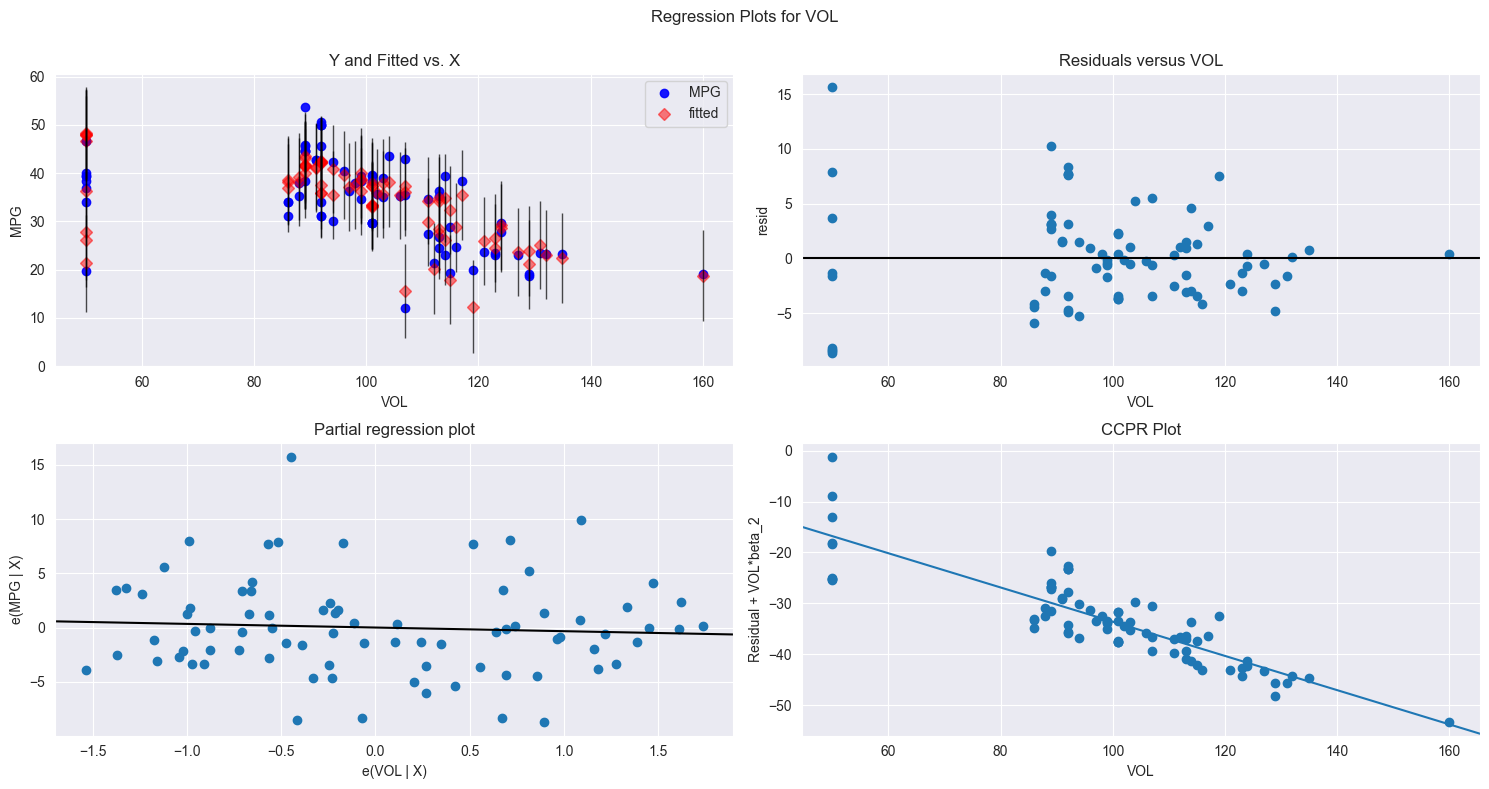

In [78]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"VOL",fig=fig)
plt.show()

in residual Vs VOL , no pattern , so all good
* 

eval_env: 1


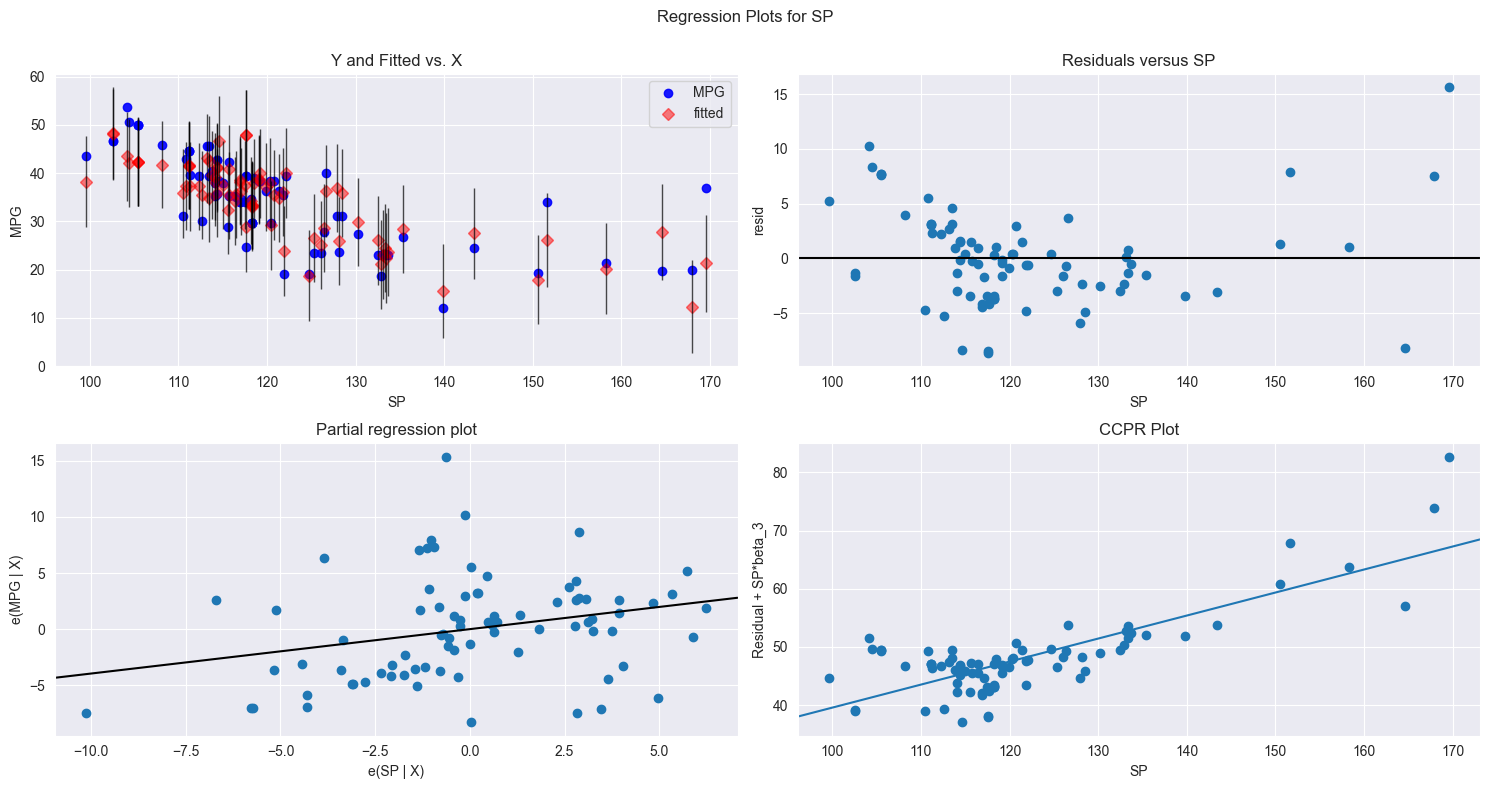

In [80]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"SP",fig=fig)
plt.show()

eval_env: 1


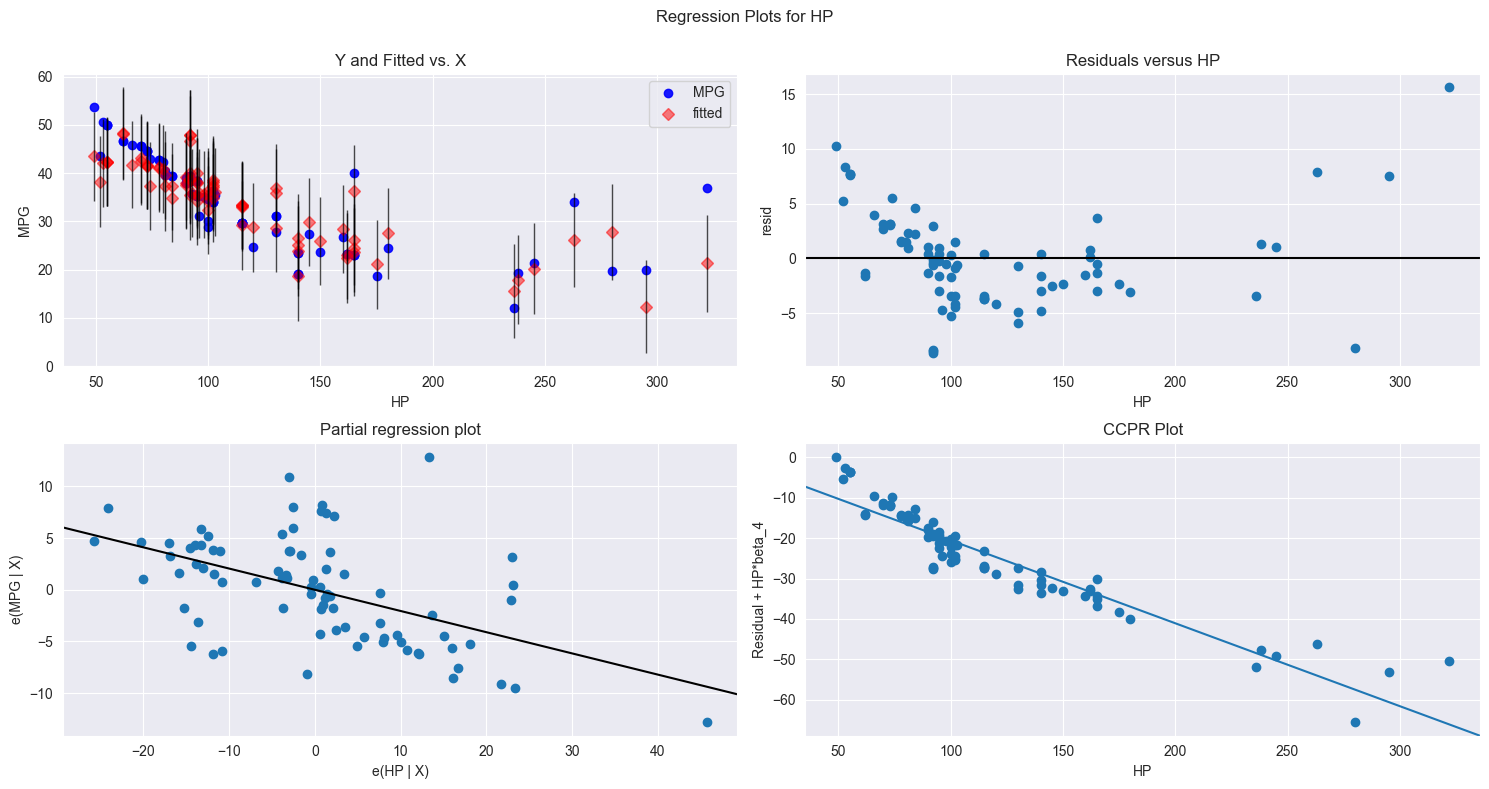

In [81]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

eval_env: 1


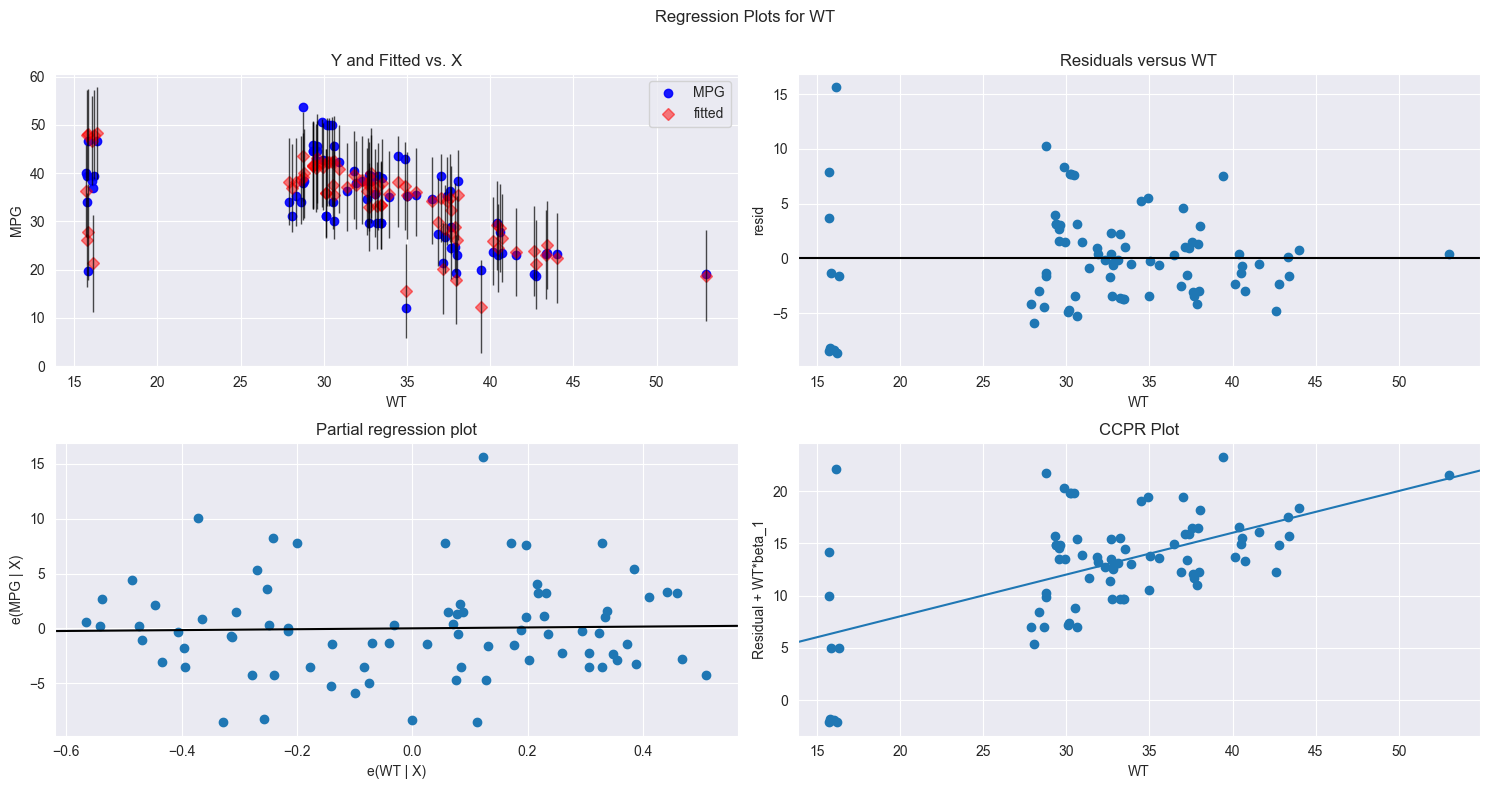

In [82]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"WT",fig=fig)
plt.show()

# model deletion diagnostics
detecting influencers/outliers

In [83]:
#COOK'S DISTANCE

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

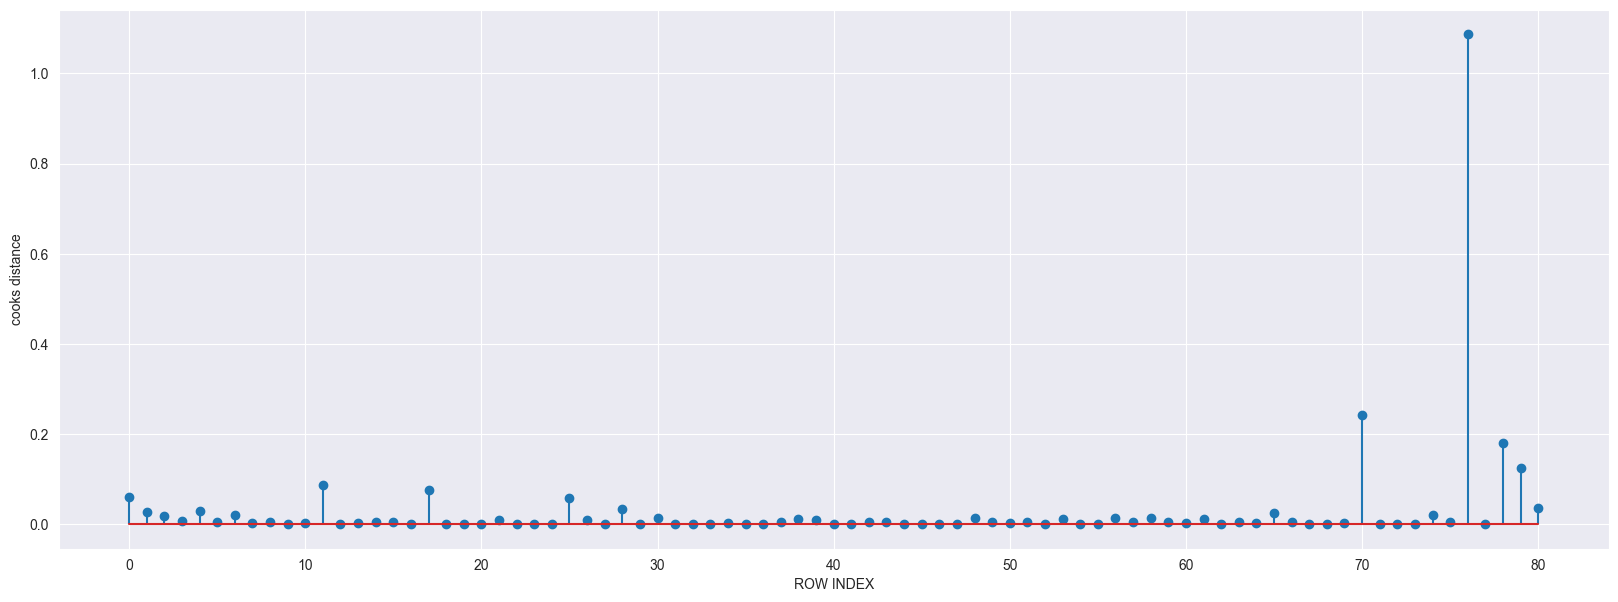

In [85]:
# plot the influencers values using stem plot
fig= plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel("ROW INDEX")
plt.ylabel("cooks distance")
plt.show()


In [87]:
#index and  values of influencer where c is more than .5
(np.argmax(c),np.max(c))    # index, distance of c 

(76, 1.0865193998180143)

high influence points/leverage

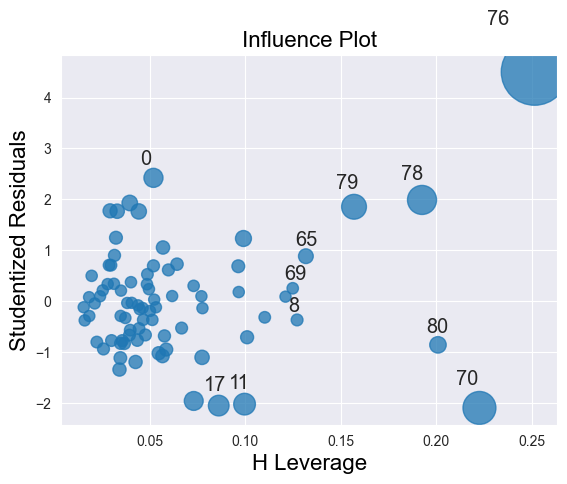

In [88]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [89]:
k= cars.shape[1]
n= cars.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [90]:
leverage_cutoff

0.2222222222222222

from the above plot, it is evident that datapoint 70 and 76 are the influencers

In [91]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [92]:
##  see the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# improving the model

In [103]:
## load the data
cars_new = pd.read_csv(r"D:\Cars.csv")
cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [105]:
#discard the data points which are influencers and reassign the row number (reset_index())
car1 =cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index(drop= True)
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# build model

In [106]:
# Exclude variable "wt " and generate R-squared and Atc values
final_ml_v= smf.ols("MPG~VOL+SP+HP",data=car1).fit()

In [107]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8161692010376007, 446.11722639447726)

In [108]:
# exclude variable "VOL " and generate r-squared and aic values
final_ml_w = smf.ols("MPG~WT+SP+HP",data=car1).fit()

In [109]:
(final_ml_w.rsquared,final_ml_w.aic)

(0.8160034320495305, 446.1884323575031)

almost equal , VOL has slight point high so go with vol

COOK'S DISTANCE

In [110]:
model_influence_V= final_ml_v.get_influence()
(c_V,_) = model_influence_V.cooks_distance

Text(0, 0.5, 'cooks distance')

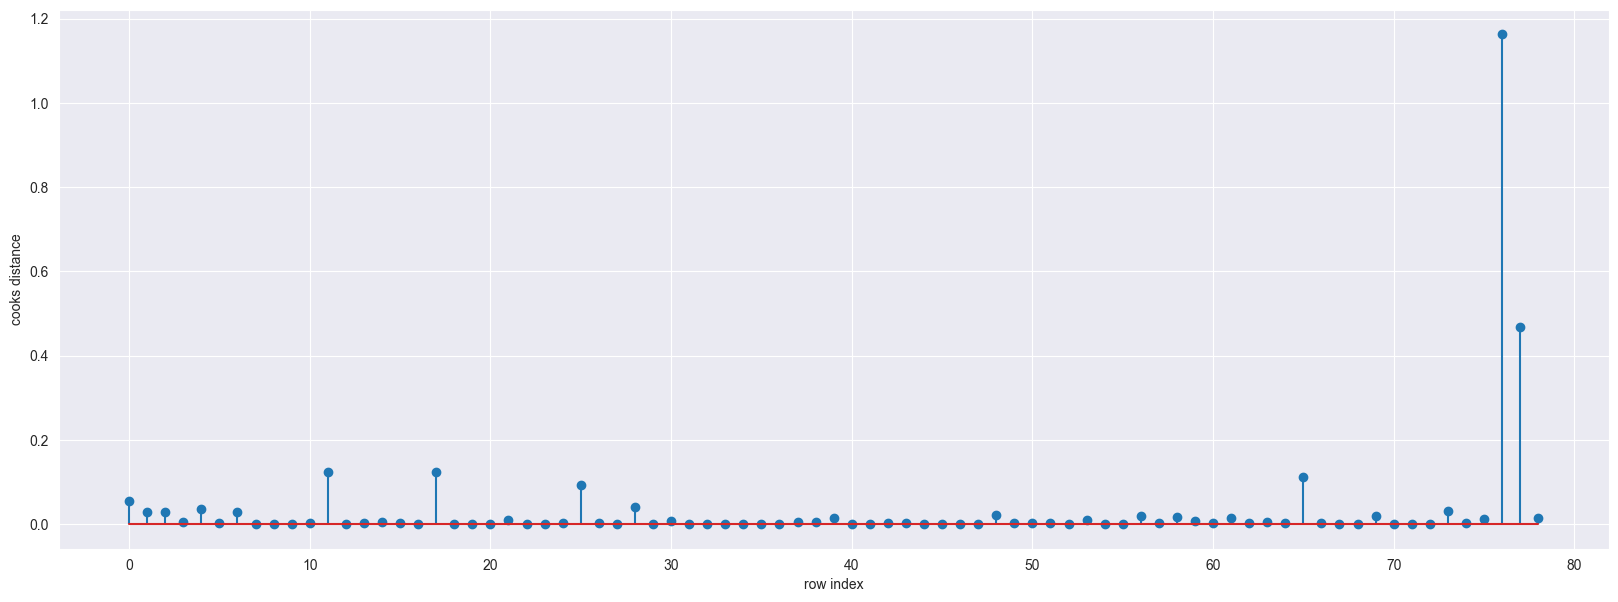

In [112]:
fig = plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3))
plt.xlabel("row index")
plt.ylabel("cooks distance")

In [113]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135222)

In [115]:
#drop 76 and 77 observations
car2  = car1.drop(car1.index[[76,77]]).reset_index(drop=True)
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [116]:
#build model with new data
final_ml_v  = smf.ols("MPG~VOL+HP+SP",data=car2).fit()


In [117]:
#again check for influencers
model_influence_V = final_ml_v.get_influence()
(c_V,_)= model_influence_V.cooks_distance

Text(0, 0.5, 'cooks distance')

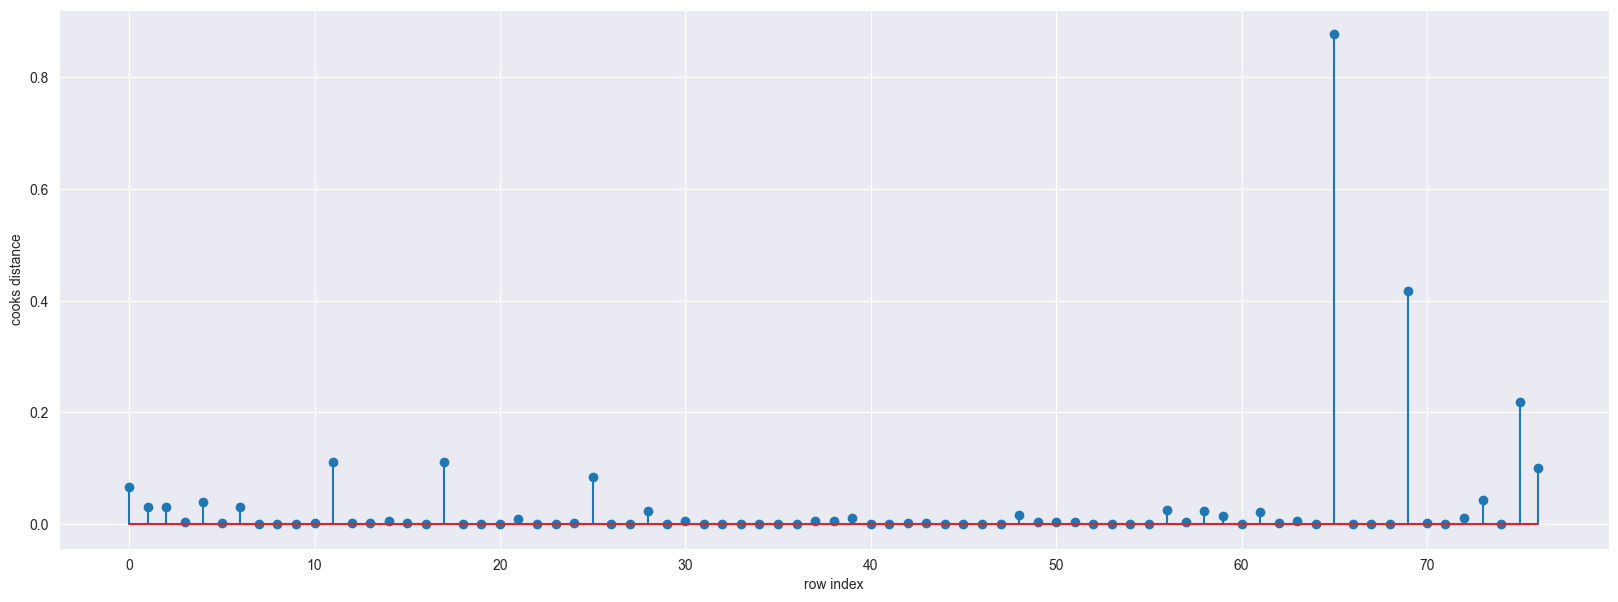

In [118]:
fig = plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(car2)),np.round(c_V,3))
plt.xlabel("row index")
plt.ylabel("cooks distance")

In [119]:
#index of the data points more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296853)

In [120]:
###SINCE THIS IS LESS THAN 1, WE CAN STP THE DIAGNOSTIC PROCESS AND FINALIZE THE MODEL

In [121]:
# CHECK THE ACCURACY
final_ml_v=smf.ols("MPG~VOL+SP+HP",data=car2).fit()

In [122]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8669636111859063, 409.4153062719508)

predicting new data

In [123]:
# new data for prediction
new_data = pd.DataFrame({"HP":40,"VOL":95,"SP":102,"WT":35},index=[1])

In [124]:
final_ml_v.predict(new_data)

1    46.035594
dtype: float64

In [126]:
pred_y = final_ml_v.predict(car2)

In [127]:
car2["y_hat"]=pred_y

In [128]:
car2

,HP,MPG,VOL,SP,WT,y_hat
0,49,53.700681,89,104.185353,28.762059,45.428872
1,55,50.013401,92,105.461264,30.466833,43.992392
2,55,50.013401,92,105.461264,30.193597,43.992392
3,70,45.696322,92,113.461264,30.632114,43.508150
4,53,50.504232,92,104.461264,29.889149,44.085858
...,...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752,20.679595
73,140,19.086341,129,121.864163,42.618698,23.666406
74,175,18.762837,129,132.864163,42.778219,19.212878
75,238,19.197888,115,150.576579,37.923113,12.198598
